In [14]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
#!wget https://raw.githubusercontent.com/datalifelab/corso-open-notebook-science/master/marradi.py

from marradi import dist_frequenza, recode_da_dizionario, plot_dist_frequenza

# Nome ed etichette della variabile 

* dare autonomia semantica all'etichetta della variabile utilizzando meno di 25-30 caratteri. Un'etichetta troppo lunga può essere scomoda. Un etichetta troppo corta può avere scarsa autonomia semantica
* segnare con una sigla le variabili che condividono alcuni aspetti della definizione operativa. Ad esempio le variabili registrate con una stessa tecnica - ad esempio nome_variabile_lik per le domande di tipo likert.

## Codebook in un dizionario Python

I dizionari (dict) sono un tipo di oggetto python, mutabile che contiene elementi (items) formati da una chiave (key) e un valore (value). Una volta che il dizionario è creato e valorizzato con un insieme di coppie <chiave, valore>, si può usare la chiave (che deve essere univoca) per ottenere il valore corrispondente.

per le operazioni su dizionario fare riferimento al [bignami](https://github.com/datalifelab/corso-open-notebook-science/blob/master/Python%20e%20Pandas%20-%20Operazioni%20base.ipynb#Dizionario)

Nel dizionario inseriremo:
* nome delle variabili
* tipo di variabile ["cardinale, "ordinale", categoriale"]
* unità di misura
* note

sarà possibile inserire altre proprietà a discrezione in base alle necessità




In [2]:

# CREAZIONE DEL LIBRO CODICE

In [3]:
len("allineamento politico 5")

23

In [4]:
prop = {"età": {"tipo": "cardinale", "note": "", "unità di misura": "anni"},
 "altezza": {"tipo": "cardinale", "note": "", "unità di misura": "cm"},
 "peso": {"tipo": "cardinale", "note": "", "unità di misura": "km"},
 "allineamento politico 5": {"tipo": "ordinale", "modalità": 
                           {1: "sinistra",
                            2: "centro sinistra",
                            3: "centro",
                            4: "centro destra",
                            5: "destra"}  ,"note": ""},
 "paese di origine": {"tipo": "categoriale", "note": "domanda a risposta aperta, richiede recodifica per utilizzo"} 
}

In [5]:
prop.keys()

dict_keys(['età', 'altezza', 'peso', 'allineamento politico 5', 'paese di origine'])

In [6]:
prop['allineamento politico 5']["modalità"].keys()

dict_keys([1, 2, 3, 4, 5])

In [7]:
pd.DataFrame([1,2,3,2,2,1,3,2,4,5,4,3,4], columns = ["allineamento politico 5"])

,allineamento politico 5
0,1
1,2
2,3
3,2
4,2
5,1
6,3
7,2
8,4
9,5


In [8]:
prop["allineamento politico 5"]["modalità"].keys()

dict_keys([1, 2, 3, 4, 5])

In [11]:
tabella1 = dist_frequenza(pd.DataFrame([1,2,3,2,2,1,3,2,4,5,4,3,4]), 0, 
               tipo = "ordinale", 
               lista_ordinale = prop["allineamento politico 5"]["modalità"].keys()
              )
tabella1

,Frequenze,Percentuale,Cumulata
1,2.0,15.38,15.3846
2,4.0,30.77,46.1538
3,3.0,23.08,69.2308
4,3.0,23.08,92.3077
5,1.0,7.69,100
Totale,13.0,100.00,


In [12]:
tabella1.index = tabella1.index.map(lambda x: recode_da_dizionario(x, prop["allineamento politico 5"]["modalità"]))

In [13]:
tabella1

,Frequenze,Percentuale,Cumulata
sinistra,2.0,15.38,15.3846
centro sinistra,4.0,30.77,46.1538
centro,3.0,23.08,69.2308
centro destra,3.0,23.08,92.3077
destra,1.0,7.69,100
Totale,13.0,100.00,


In [19]:
help(plot_dist_frequenza)

Help on function plot_dist_frequenza in module marradi:

plot_dist_frequenza(distribuzione, tipo='categoriale', Y='Percentuale', x_label='Valori', y_label='Percentuale', figsize=(12, 8))
    distribuzione: inserire risultato della funzione dist_frequenza
    tipo: 
        "categoriale": classi non ordinate
        "ordinale": classi ordinate
        "cardinale": valori numerici
    x_label: etichetta asse x
    y_label: etichetta_asse y



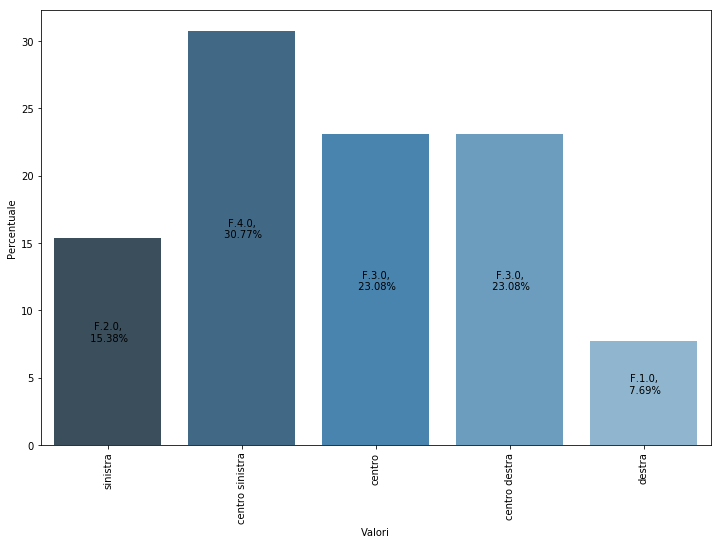

In [18]:
plot_dist_frequenza(tabella1, tipo='ordinale')
